In [1]:
## import all necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
data = data.rename(columns = {"cp":"chest_pain",'trtbps':'resting_bloodpressure','thalachh':'maximum_heart_rate'})

In [7]:
data.head()

,age,sex,chest_pain,resting_bloodpressure,chol,fbs,restecg,maximum_heart_rate,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.columns

Index(['age', 'sex', 'chest_pain', 'resting_bloodpressure', 'chol', 'fbs',
       'restecg', 'maximum_heart_rate', 'exng', 'oldpeak', 'slp', 'caa',
       'thall', 'output'],
      dtype='object')

In [9]:
data.isnull().sum()

age                      0
sex                      0
chest_pain               0
resting_bloodpressure    0
chol                     0
fbs                      0
restecg                  0
maximum_heart_rate       0
exng                     0
oldpeak                  0
slp                      0
caa                      0
thall                    0
output                   0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_bloodpressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
maximum_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    int64  
 1   sex                    303 non-null    int64  
 2   chest_pain             303 non-null    int64  
 3   resting_bloodpressure  303 non-null    int64  
 4   chol                   303 non-null    int64  
 5   fbs                    303 non-null    int64  
 6   restecg                303 non-null    int64  
 7   maximum_heart_rate     303 non-null    int64  
 8   exng                   303 non-null    int64  
 9   oldpeak                303 non-null    float64
 10  slp                    303 non-null    int64  
 11  caa                    303 non-null    int64  
 12  thall                  303 non-null    int64  
 13  output                 303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data.corr()

,age,sex,chest_pain,resting_bloodpressure,chol,fbs,restecg,maximum_heart_rate,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_bloodpressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
maximum_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

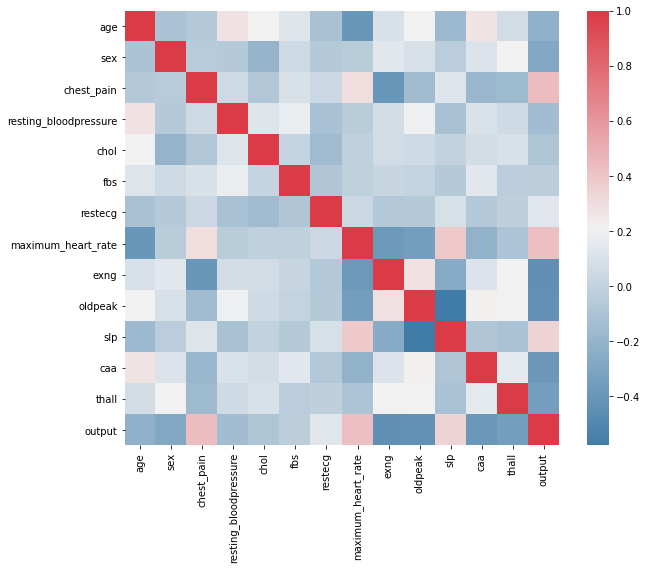

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

<AxesSubplot:xlabel='output', ylabel='count'>

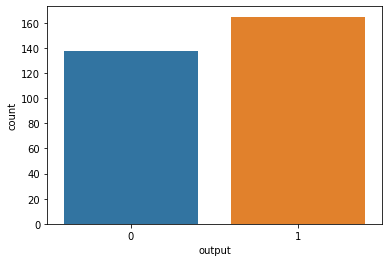

In [14]:
sns.countplot(data['output'])

### this is balanced dataset

<AxesSubplot:xlabel='age', ylabel='count'>

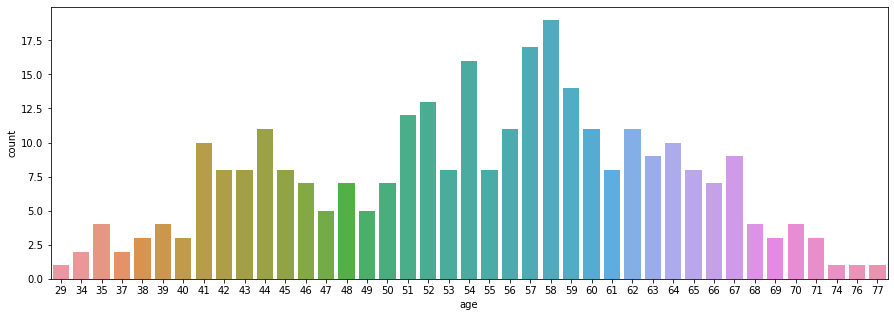

In [15]:
plt.figure(figsize = (15,5))
sns.countplot(data['age'])

#### in this dataset patient's age is from 29 to 77

<AxesSubplot:xlabel='maximum_heart_rate', ylabel='count'>

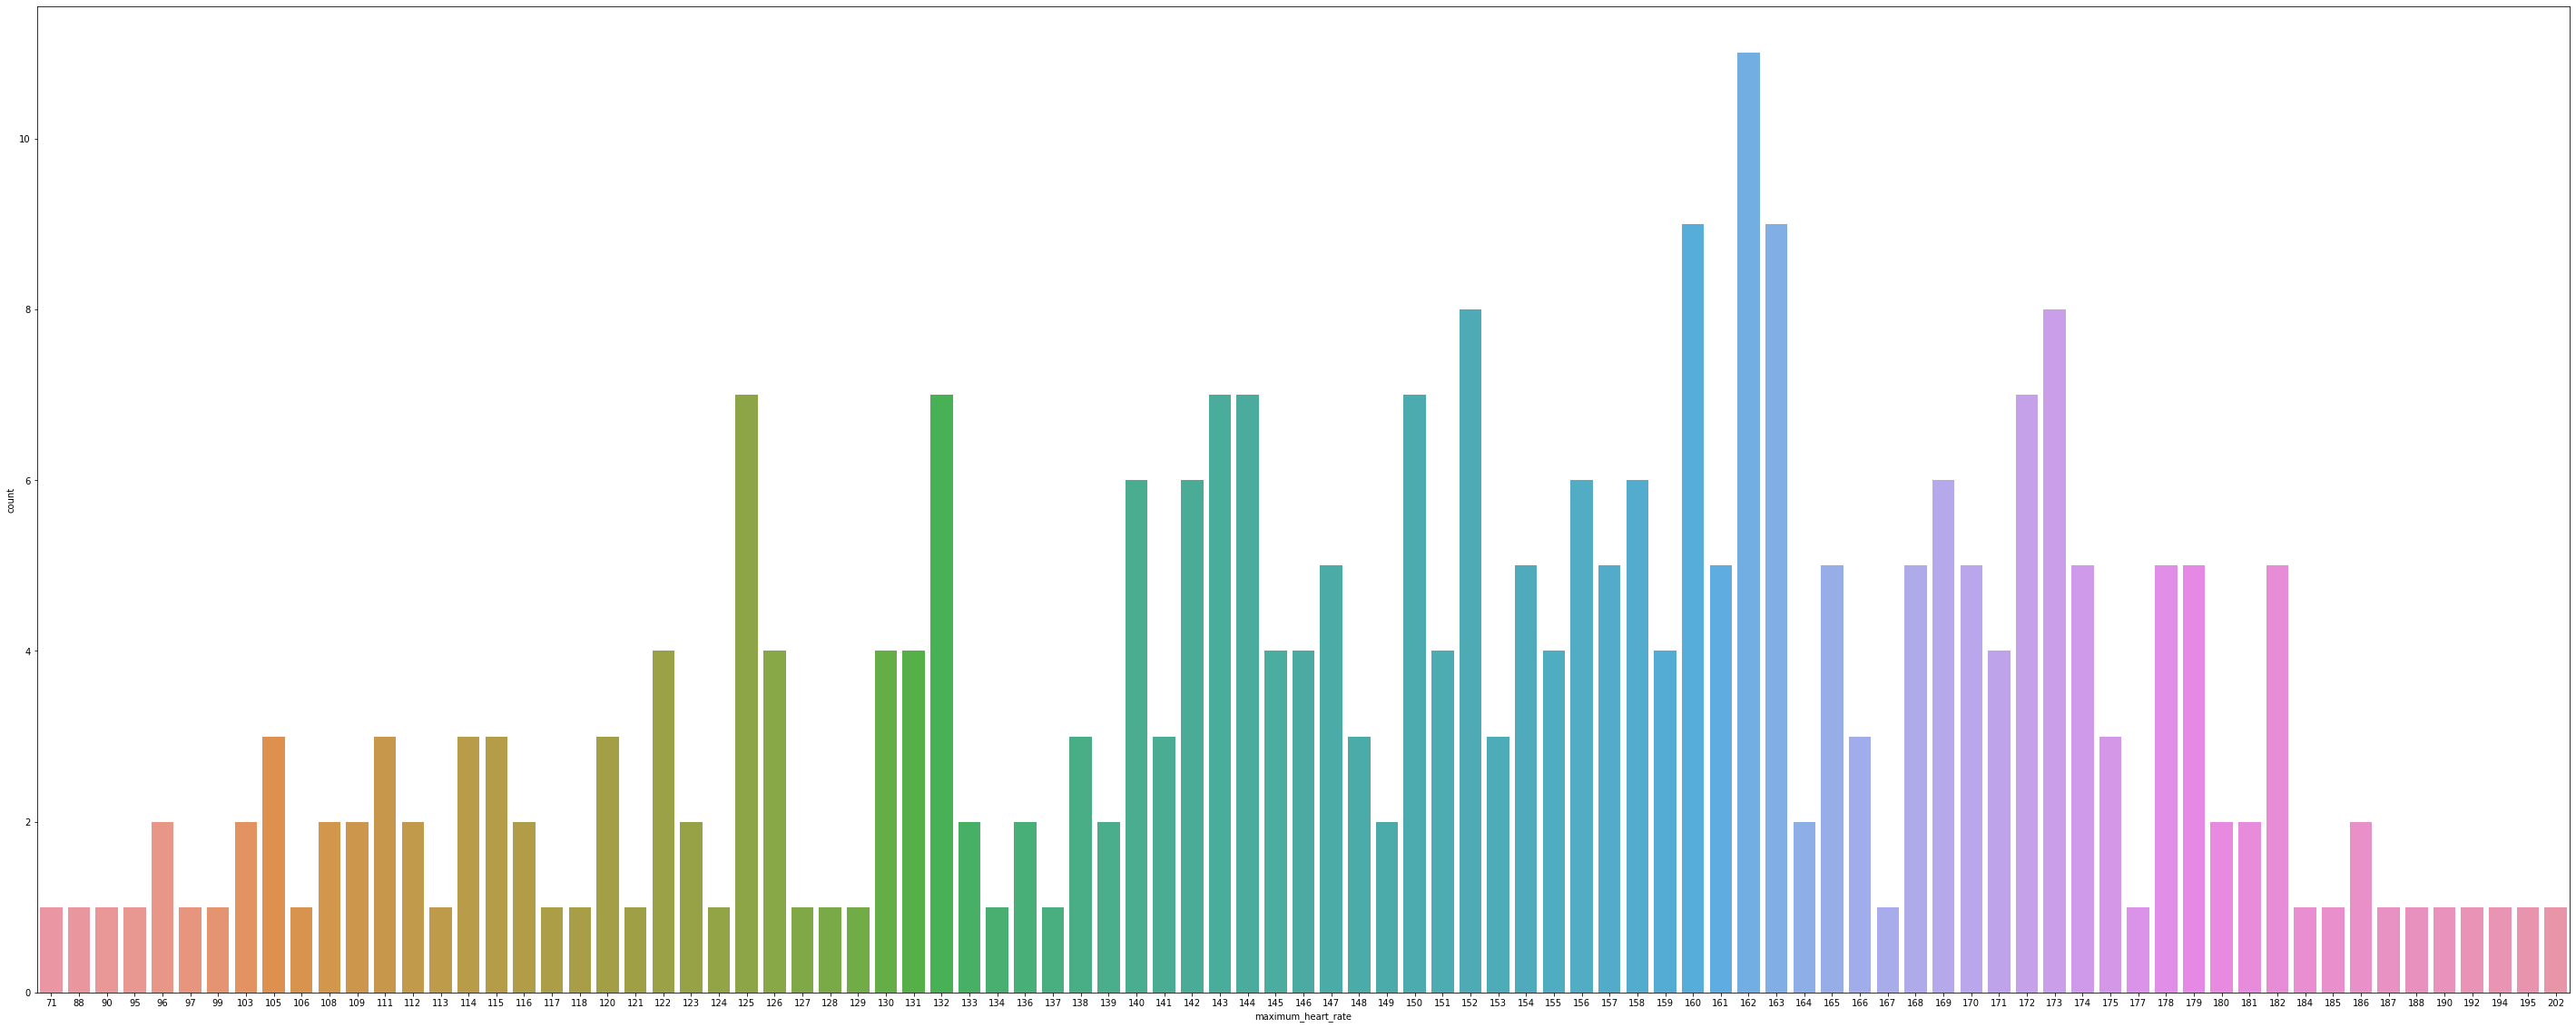

In [16]:
plt.figure(figsize = (50,20))
sns.countplot(data['maximum_heart_rate'])

<AxesSubplot:xlabel='output', ylabel='count'>

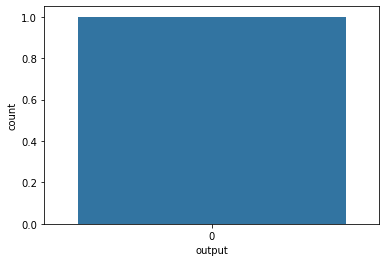

In [17]:
sns.countplot(data[(data.maximum_heart_rate==71)]['output'])

<AxesSubplot:xlabel='output', ylabel='count'>

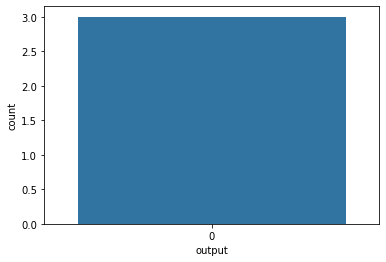

In [18]:
sns.countplot(data[(data.maximum_heart_rate==120)]['output'])

### it seems that if person having a maximum heart rate ranges between 71 - 120.. the output will be 0 means less chances of heart attack

<AxesSubplot:xlabel='output', ylabel='count'>

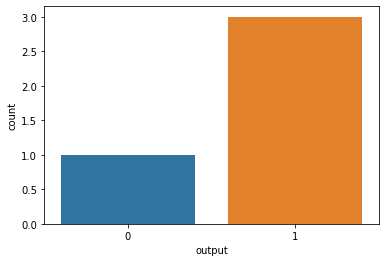

In [19]:
sns.countplot(data[(data.maximum_heart_rate==122)]['output'])

<AxesSubplot:xlabel='output', ylabel='count'>

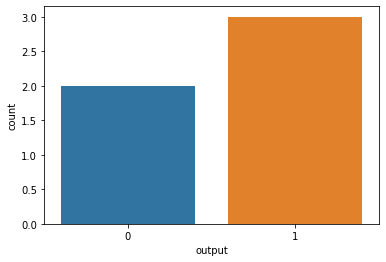

In [20]:
sns.countplot(data[(data.maximum_heart_rate==174)]['output'])

### and as according to above graph  if heart rate ranges between 121 - 174 person having both the chancess of output 0 and 1

<AxesSubplot:xlabel='output', ylabel='count'>

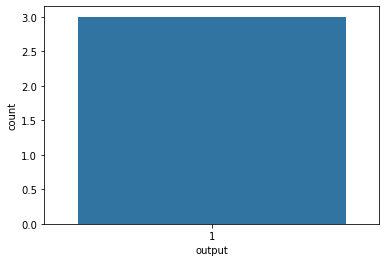

In [21]:
sns.countplot(data[(data.maximum_heart_rate==175)]['output'])

<AxesSubplot:xlabel='output', ylabel='count'>

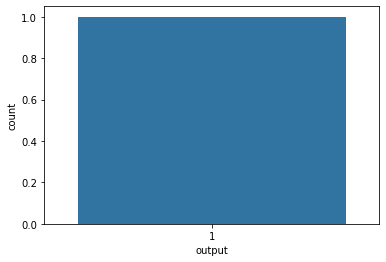

In [22]:
sns.countplot(data[(data.maximum_heart_rate==202)]['output'])

### heart rate ranges between 175 - 202 the output will be 1... means more chancess of heart attack
### note --- 202 is maximum heart rate in our  dataset

In [23]:
data.maximum_heart_rate.max()

202

Text(0.5, 1.0, 'chest pain having less chances of heartattack')

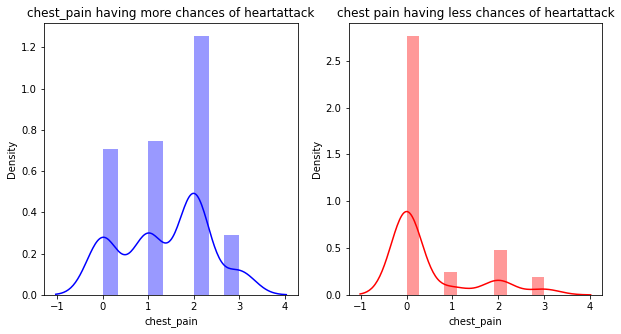

In [24]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
sns.distplot(data[(data.output==1)]['chest_pain'],color = 'b',ax=ax)
ax.set_title('chest_pain having more chances of heartattack')

ax = f.add_subplot(122)
sns.distplot(data[(data.output == 0)]['chest_pain'],color = 'r',ax=ax)
ax.set_title("chest pain having less chances of heartattack")

#### person having more chest pain having more chancess of heart attck
#### person having less chest pain having less chancess of heart attack

In [25]:
data['chest_pain'].unique()

array([3, 2, 1, 0], dtype=int64)

Text(0.5, 1.0, 'distribution of age having less chances of heartattack')

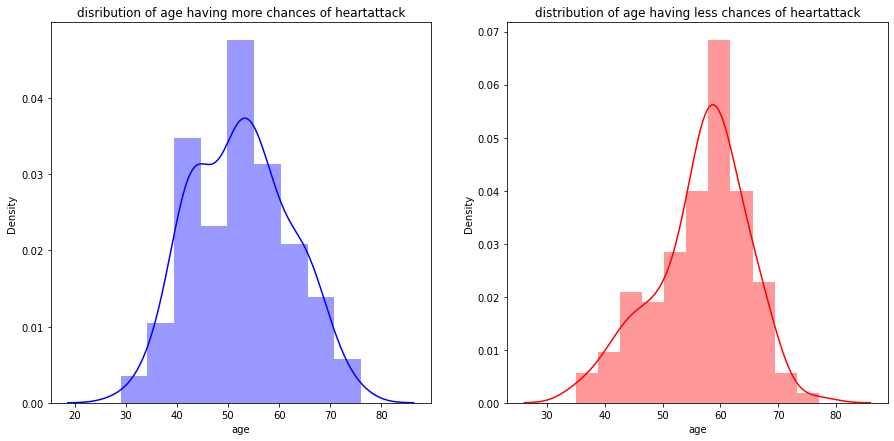

In [26]:
f = plt.figure(figsize=(15,7))
ax = f.add_subplot(121)
sns.distplot(data[(data.output == 1)]['age'],color = 'b',ax=ax)
ax.set_title('disribution of age having more chances of heartattack')

ax = f.add_subplot(122)
sns.distplot(data[(data.output==0)]['age'],color ='r',ax=ax)
ax.set_title("distribution of age having less chances of heartattack")
             
             

#### on the basis of age we cannot say that the person having more or less chances of heart attack

Text(0.5, 1.0, 'distribution of fasting blood sugar having less chances of heartattack')

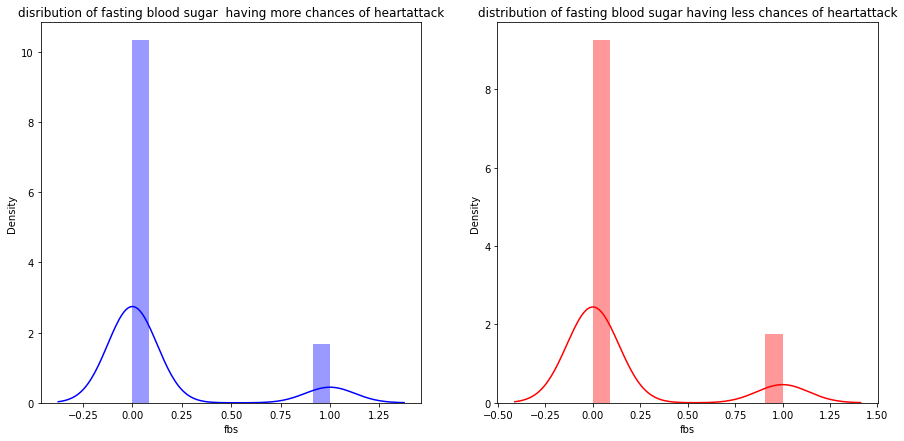

In [27]:
f = plt.figure(figsize=(15,7))
ax = f.add_subplot(121)
sns.distplot(data[(data.output == 1)]['fbs'],color = 'b',ax=ax)
ax.set_title('disribution of fasting blood sugar  having more chances of heartattack')

ax = f.add_subplot(122)
sns.distplot(data[(data.output==0)]['fbs'],color ='r',ax=ax)
ax.set_title("distribution of fasting blood sugar having less chances of heartattack")
             
             

### fasting blood sugar is not very much effective on output

# Now we train the model

### seperate the dependent and independent variable

In [28]:
feature =data.drop(['output'],axis = 1)
target = data[['output']]

In [29]:
feature.head()

,age,sex,chest_pain,resting_bloodpressure,chol,fbs,restecg,maximum_heart_rate,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
target.head()

,output
0,1
1,1
2,1
3,1
4,1


### standerdized the values for better accuracy

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
ss = StandardScaler()
feature = ss.fit_transform(feature)


In [33]:
feature

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [34]:
target

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


### split the data into training and testing

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size = 20,random_state = 42)

In [36]:
print('shape of X_train',X_train.shape)
print('shape of X_test',X_test.shape)
print('shape of y_train',y_train.shape)
print('shape of y_test',y_test.shape)

shape of X_train (283, 13)
shape of X_test (20, 13)
shape of y_train (283, 1)
shape of y_test (20, 1)


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
pred = knn.predict(X_test)
pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [40]:
df = pd.DataFrame({'actual':y_test['output'][:20].values,'predicted':pred[:20].ravel()})
df

,actual,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1
6,1,1
7,0,0
8,0,0
9,1,1


In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,pred))

[[ 9  0]
 [ 1 10]]


In [43]:
accuracy_score(y_test,pred)*100

95.0

In [44]:
print("report",classification_report(y_test,pred))

report               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

